In [45]:
from math import pi
import matplotlib.pyplot as plt
from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now

In [46]:
num_qubits=1
dev=qml.device('default.qubit', wires=num_qubits)
seed = 40
np.random.seed(seed)

In [47]:
# t=np.random.uniform(0,1,size=50,requires_grad=False)
t = [0.0, 0.02040816326530612, 0.04081632653061224, 0.061224489795918366, 0.08163265306122448, 0.10204081632653061, 0.12244897959183673, 0.14285714285714285, 0.16326530612244897, 0.1836734693877551, 0.20408163265306123, 0.22448979591836735, 0.24489795918367346, 0.2653061224489796, 0.2857142857142857, 0.30612244897959184, 0.32653061224489793, 0.3469387755102041, 0.3673469387755102, 0.3877551020408163, 0.40816326530612246, 0.42857142857142855, 0.4489795918367347, 0.46938775510204084, 0.4897959183673469, 0.5102040816326531, 0.5306122448979592, 0.5510204081632653, 0.5714285714285714, 0.5918367346938775, 0.6122448979591837, 0.6326530612244898, 0.6530612244897959, 0.673469387755102, 0.6938775510204082, 0.7142857142857143, 0.7346938775510204, 0.7551020408163265, 0.7755102040816326, 0.7959183673469388, 0.8163265306122449, 0.8367346938775511, 0.8571428571428571, 0.8775510204081632, 0.8979591836734694, 0.9183673469387755, 0.9387755102040817, 0.9591836734693877, 0.9795918367346939, 1.0]
d_t = (t[1]-t[0])

In [48]:
@qml.qnode(dev, diff_method="backprop", interface="autograd")
def hepler(encoded_x):
    qml.QubitStateVector(encoded_x,wires=[0])
    qml.RY(wires=0,phi=np.pi/2)
    return qml.probs(wires=[0])

In [49]:
def encoder(x):
    vector_x = [1,x]
    norm_x = np.linalg.norm(vector_x)
    return vector_x/norm_x , norm_x

In [50]:
def f(x):
    encoded_x,norm_x = encoder(x)
    # print(qml.draw(hepler)(encoded_x))
    f_val = hepler(encoded_x)
    # return f_val[1]*norm_x
    return f_val[1]*(norm_x**2)

In [51]:
f(-1.7)

tensor(0.245, requires_grad=True)

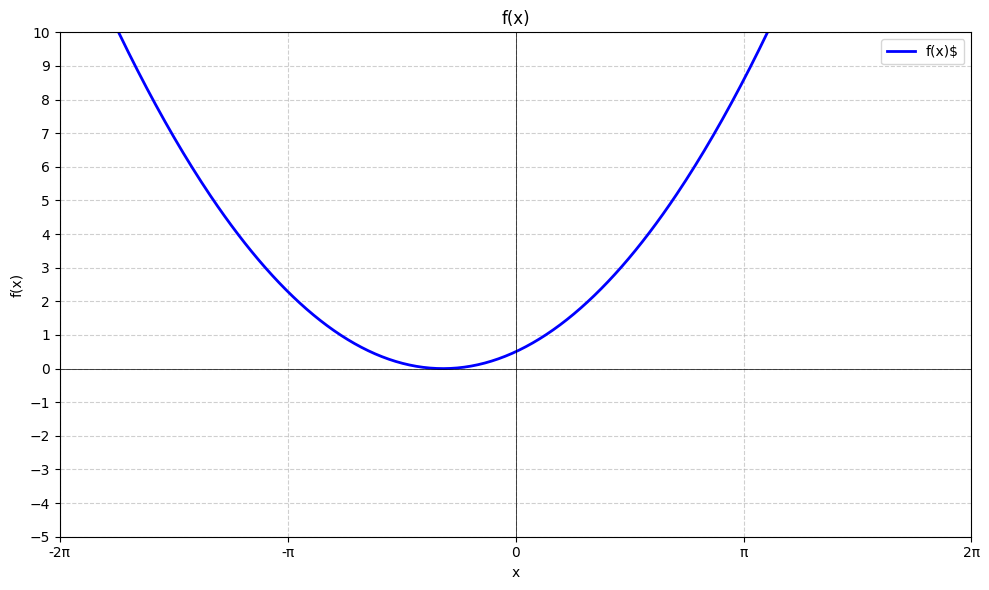

In [52]:
import numpy as np
import matplotlib.pyplot as plt



x = np.linspace(-2*np.pi, 2*np.pi, 400)


y = [f(x) for x in x] 


plt.figure(figsize=(10, 6))  
plt.plot(x, y, label='f(x)$', linewidth=2, color='b')  
plt.xlabel('x')  # X-axis label
plt.ylabel('f(x)')  # Y-axis label
plt.title('f(x)')  # 
plt.grid(True, linestyle='--', alpha=0.6) 
plt.legend()  
plt.axhline(0, color='black',linewidth=0.5) 
plt.axvline(0, color='black',linewidth=0.5) 
plt.ylim([-5, 10])  
plt.xlim([-2*np.pi, 2*np.pi])  #
plt.xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi], ['-2π', '-π', '0', 'π', '2π'])  # Custom x-axis ticks
plt.yticks(np.arange(-5, 11, 1))  
plt.tight_layout()  

plt.show() 


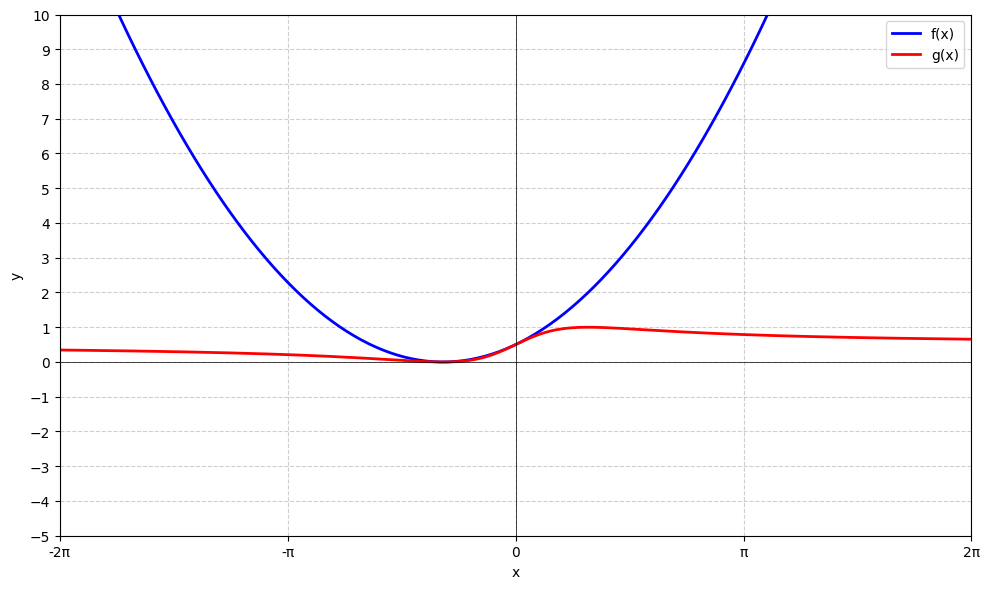

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.linspace(-10, 10, 400)

y1 = [f(x) for x in x]  # Define your function f(x) here
y2 = [f(x)/(1+x**2) for x in x]  # Define your second function here

plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='f(x)', linewidth=2, color='b')  # Plot y1
plt.plot(x, y2, label='g(x)', linewidth=2, color='r')  # Plot y2
plt.xlabel('x')  # X-axis label
plt.ylabel('y')  # Y-axis label
plt.title('')  # Title
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.ylim([-5, 10])
plt.xlim([-2*np.pi, 2*np.pi])
plt.xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi], ['-2π', '-π', '0', 'π', '2π'])
plt.yticks(np.arange(-5, 11, 1))
plt.tight_layout()

plt.show()
